# Accuracy comparision of different supervised machine algorithms


For this project we have taken available data from LendingClub.com. Lending Club connects people who need money (borrowers) with people who have money (investors). Hopefully, as an investor we would want to invest in people who showed a profile of having a high probability of paying you back. We will try to create model that help to predict it by using different alogorithms in order to safe our money while investing to borrowers.

In 2016 it had quite intersting year because of less transaction. It was happen cause of bad debts people scared to invest on it.

We wii use sample data from 2007-2010 and be trying to classify and predict whether or not the borrower paid back their loan in full. 


## Symbol belongs to columns:


credit.policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.

purpose: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").


int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.


installment: The monthly installments owed by the borrower if the loan is funded.


log.annual.inc: The natural log of the self-reported annual income of the borrower.


dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).


fico: The FICO credit score of the borrower.


days.with.cr.line: The number of days the borrower has had a credit line.


revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).


revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).


inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.


delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.


pub.rec: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).

# Importing required tool for data loading, data mining, data formatting,visualization etc

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Uploading data

In [3]:
loan_data = pd.read_csv('loan_data.csv')

#### note: we upload data using api also we can also other type of file like json,xls,excel etc.

#### Checking the data types of each columns

In [4]:
loan_data.dtypes

credit.policy          int64
purpose               object
int.rate             float64
installment          float64
log.annual.inc       float64
dti                  float64
fico                   int64
days.with.cr.line    float64
revol.bal              int64
revol.util           float64
inq.last.6mths         int64
delinq.2yrs            int64
pub.rec                int64
not.fully.paid         int64
dtype: object

In [5]:
## Shape of data

In [6]:
loan_data.shape

(9578, 14)

### Using different method on data to figureout clearly:

In [7]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
credit.policy        9578 non-null int64
purpose              9578 non-null object
int.rate             9578 non-null float64
installment          9578 non-null float64
log.annual.inc       9578 non-null float64
dti                  9578 non-null float64
fico                 9578 non-null int64
days.with.cr.line    9578 non-null float64
revol.bal            9578 non-null int64
revol.util           9578 non-null float64
inq.last.6mths       9578 non-null int64
delinq.2yrs          9578 non-null int64
pub.rec              9578 non-null int64
not.fully.paid       9578 non-null int64
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [8]:
loan_data.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [9]:
loan_data.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [10]:
loan_data.tail()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
9573,0,all_other,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1
9574,0,all_other,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1
9575,0,debt_consolidation,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1
9576,0,home_improvement,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1
9577,0,debt_consolidation,0.1392,853.43,11.264464,16.28,732,4740.000000,37879,57.0,6,0,0,1


## Exploratory Data Analysis

### Creating a histogram of two FICO distributions on top of each other, one for each credit.policy outcome.

Text(0.5, 0, 'FICO')

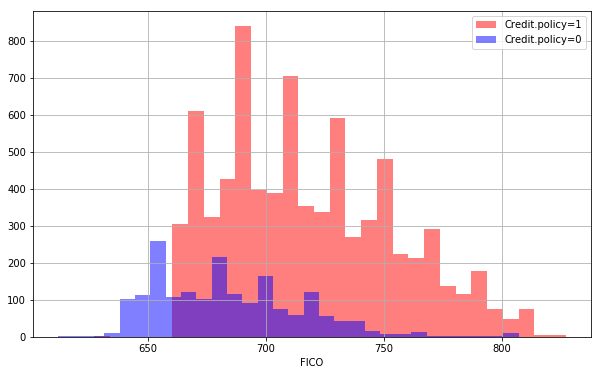

In [11]:
plt.figure(figsize=(10,6))
loan_data[loan_data['credit.policy']==1]['fico'].hist(alpha=0.5,bins=30,color='red',label='Credit.policy=1')
loan_data[loan_data['credit.policy']==0]['fico'].hist(alpha=0.5, bins=30,color='blue',label='Credit.policy=0')
plt.legend()
plt.xlabel('FICO')


### Making similary diagram using not full paid feature.

Text(0.5, 0, 'FICO')

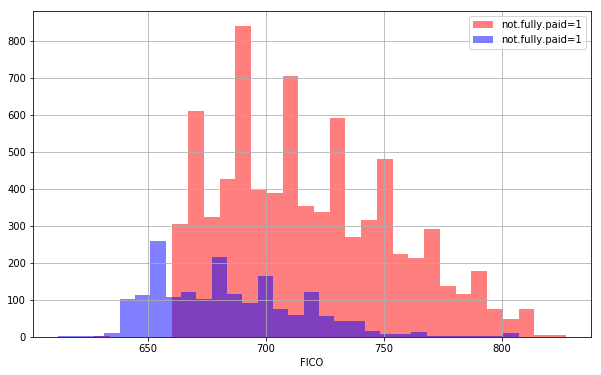

In [12]:
plt.figure(figsize=(10,6))
loan_data[loan_data['credit.policy']==1]['fico'].hist(alpha=0.5,bins=30,color='red',label='not.fully.paid=1')
loan_data[loan_data['credit.policy']==0]['fico'].hist(alpha=0.5, bins=30,color='blue',label= 'not.fully.paid=1')
plt.legend()
plt.xlabel('FICO')

### Counting number of loans by purpose with color defined by not.fully.paid as a color

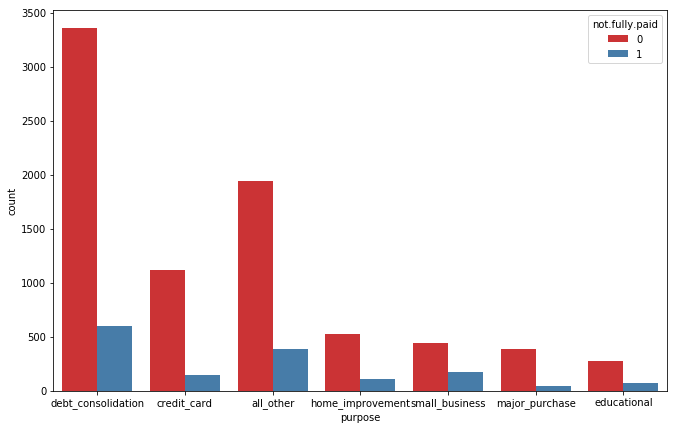

In [13]:
plt.figure(figsize=(11,7))
sns.countplot(x='purpose', hue= 'not.fully.paid', data=loan_data,palette='Set1')

Creating jointplot to see the trend between fico score and interest rate

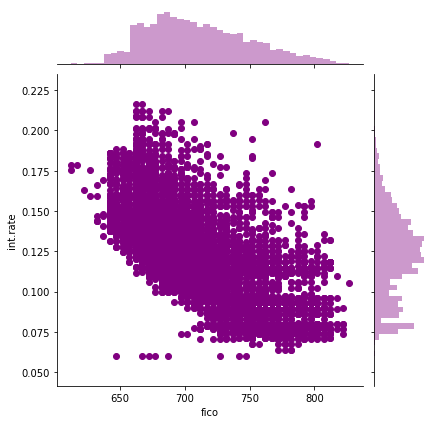

In [14]:
sns.jointplot(x='fico',y='int.rate', data= loan_data, color='purple')

Creating the lmplots to see if the trend differed between not.fully.paid and credit.policy.

<Figure size 792x504 with 0 Axes>

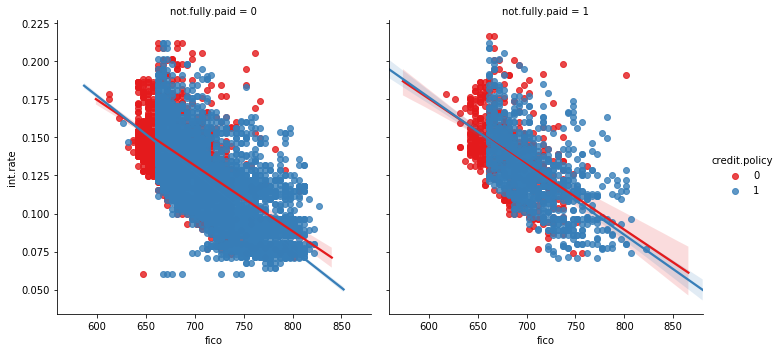

In [15]:
plt.figure(figsize=(11,7))
sns.lmplot(y='int.rate',x='fico',data=loan_data,hue='credit.policy',
           col='not.fully.paid',palette='Set1')

In above data purpose column is a categorical feature type column so we can get its dummy variable

In [19]:
final_data = pd.get_dummies(loan_data,columns=['purpose'], drop_first=True)
final_data.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0


In [20]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 19 columns):
credit.policy                 9578 non-null int64
int.rate                      9578 non-null float64
installment                   9578 non-null float64
log.annual.inc                9578 non-null float64
dti                           9578 non-null float64
fico                          9578 non-null int64
days.with.cr.line             9578 non-null float64
revol.bal                     9578 non-null int64
revol.util                    9578 non-null float64
inq.last.6mths                9578 non-null int64
delinq.2yrs                   9578 non-null int64
pub.rec                       9578 non-null int64
not.fully.paid                9578 non-null int64
purpose_credit_card           9578 non-null uint8
purpose_debt_consolidation    9578 non-null uint8
purpose_educational           9578 non-null uint8
purpose_home_improvement      9578 non-null uint8
purpose_major_purchase        9

For Machine Learning part we make target data as y and feature matrix as x

#### Machice learning part: Train test split

In [23]:
import sklearn
from sklearn.model_selection import train_test_split

In [24]:
X = final_data.drop('not.fully.paid',axis=1)
y = final_data['not.fully.paid']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

## Decision tree model

In [25]:
from sklearn.tree import DecisionTreeClassifier

# creating model

dt = DecisionTreeClassifier()

# Fitting it to the training set

dt.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

#### Prediction and evaluation of decision tree model

In [37]:
predictions = dt.predict(X_test)
predictions[:5]

array([0, 1, 0, 1, 0], dtype=int64)

In [38]:
from sklearn.metrics import classification_report,confusion_matrix

In [39]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.86      0.83      0.84      2431
           1       0.20      0.23      0.22       443

   micro avg       0.74      0.74      0.74      2874
   macro avg       0.53      0.53      0.53      2874
weighted avg       0.75      0.74      0.75      2874



Confusion Matrix

In [40]:
confusion_matrix(y_test,predictions)

array([[2014,  417],
       [ 339,  104]], dtype=int64)

## Random Forest Model

In [34]:
from sklearn.ensemble import RandomForestClassifier

# Creating model
Rand_forest = RandomForestClassifier(n_estimators=100)

# fitting the training data on random forest model

Rand_forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

### Prediction and evalution of random forest model

In [35]:
prediction = Rand_forest.predict(X_test)
prediction[:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [42]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2431
           1       0.48      0.02      0.04       443

   micro avg       0.85      0.85      0.85      2874
   macro avg       0.66      0.51      0.48      2874
weighted avg       0.79      0.85      0.78      2874



In [43]:
confusion_matrix(y_test,prediction)

array([[2420,   11],
       [ 433,   10]], dtype=int64)

## Logistic Regression Model

In [49]:
from sklearn.linear_model import LogisticRegression

# creating a model 
log_reg = LogisticRegression()

#fitting model

log_reg.fit(X_train,y_train)

C:\Users\Tikaram\Anacondan\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

### Prediction and Evaluation

In [50]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import preprocessing

In [51]:
prediction_L = log_reg.predict(X_test)

In [52]:
print(classification_report(y_test,prediction_L))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2431
           1       0.50      0.01      0.02       443

   micro avg       0.85      0.85      0.85      2874
   macro avg       0.67      0.50      0.47      2874
weighted avg       0.79      0.85      0.78      2874



In [53]:
confusion_matrix(y_test, prediction_L)

array([[2426,    5],
       [ 438,    5]], dtype=int64)

## KNN Model (we will choose suitable value of k paramter)

In [54]:
from sklearn.neighbors import KNeighborsClassifier

 we also find the error rates on different value of k

In [55]:
error = [] # for the collection of error value

for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_test,y_test)
    predict = knn.predict(X_test)
    error.append(np.mean(predict !=y_test))


Visualise the error rate

Text(0, 0.5, 'Error Rate')

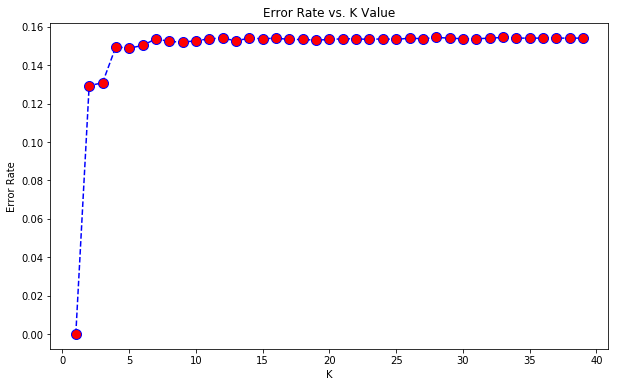

In [65]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [66]:
min(error)

0.0

#### Building a knn model with k value 30

In [68]:
knn = KNeighborsClassifier(n_neighbors=30)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

### Evaluation

In [69]:
print(confusion_matrix(y_test,pred))

[[2431    0]
 [ 443    0]]


In [70]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2431
           1       0.00      0.00      0.00       443

   micro avg       0.85      0.85      0.85      2874
   macro avg       0.42      0.50      0.46      2874
weighted avg       0.72      0.85      0.78      2874



C:\Users\Tikaram\Anacondan\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Tikaram\Anacondan\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Tikaram\Anacondan\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## Suppport Vector Machine

In [73]:
from sklearn import svm
clf = svm.SVC()
clf.fit(X_train, y_train)

C:\Users\Tikaram\Anacondan\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

prediction

In [74]:
pred_svm = clf.predict(X_test)

## Evaluation

In [76]:
print(classification_report(y_test,pred_svm))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2431
           1       0.00      0.00      0.00       443

   micro avg       0.85      0.85      0.85      2874
   macro avg       0.42      0.50      0.46      2874
weighted avg       0.72      0.85      0.78      2874



C:\Users\Tikaram\Anacondan\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Tikaram\Anacondan\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Tikaram\Anacondan\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


f1 score

In [84]:
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

In [85]:
f1_score(y_test, pred_svm, average='weighted')

C:\Users\Tikaram\Anacondan\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.7752249850294197

In [86]:
from sklearn.metrics import jaccard_similarity_score

Making report of all model

In [88]:
# decision tree:
prd = dt.predict(X_test)
jc_d = jaccard_similarity_score(y_test,prd)
f1_d = f1_score(y_test,prd, average='weighted')


# Random forest:
pr_r = Rand_forest.predict(X_test)
jc_r = jaccard_similarity_score(y_test,pr_r)
f1_r = f1_score(y_test,pr_r, average='weighted')


#Logistic:
pr_l = log_reg.predict(X_test)
jc_l = jaccard_similarity_score(y_test,pr_l)
f1_l = f1_score(y_test,pr_l)


    #for logloss:
proba = log_reg.predict_proba(X_test)
logloss = log_loss(y_test,proba)


# KNN
pr_k = knn.predict(X_test)
jc_k = jaccard_similarity_score(y_test,pr_k)
f1_k = f1_score(y_test,pr_k)


## Support vector machine
pr_s = clf.predict(X_test)
jc_s = jaccard_similarity_score(y_test, pr_s)
f1_s = f1_score(y_test, pr_s)

list_jc = [jc_d,jc_k,jc_l,jc_r,jc_s]
list_fs =[f1_d,f1_k,f1_l,f1_r,f1_s]
list_log = ['NA','NA',logloss,'NA','NA']


C:\Users\Tikaram\Anacondan\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Tikaram\Anacondan\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [89]:
list_jc = [jc_d,jc_k,jc_l,jc_r,jc_s]
list_fs =[f1_d,f1_k,f1_l,f1_r,f1_s]
list_log = ['NA','NA',logloss,'NA','NA']

In [94]:
df = pd.DataFrame(list_jc, index=['Decision Tree','KNN','Logistic','Random Forest','Support Vector'], columns=['Jaccard'])
df

,Jaccard
Decision Tree,0.736952
KNN,0.845859
Logistic,0.845859
Random Forest,0.845511
Support Vector,0.845859


In [95]:
df.insert(loc=1, column='F1-score', value=list_fs)
df.insert(loc=2, column='LogLoss', value=list_log)
df.columns.name = 'Algorithm'
df

Algorithm,Jaccard,F1-score,LogLoss
Decision Tree,0.736952,0.745450,NA
KNN,0.845859,0.000000,NA
Logistic,0.845859,0.022075,0.414071
Random Forest,0.845511,0.781428,NA
Support Vector,0.845859,0.000000,NA
